In [1]:
#importing the necessary libraries

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Embedding
from keras import Model
from keras.layers import Input
from keras import optimizers
from keras import layers
import os
from matplotlib import pyplot as plt
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM


In [2]:
#Downloading the data from keras

features = 10000
length = 20

#splitting the data into train and test datasets

(imdbtext_train, imdblabel_train),(imdbtext_test, imdblabel_test) = imdb.load_data(num_words = features)

imdbtext_train = pad_sequences(imdbtext_train, maxlen = length)
imdbtext_test = pad_sequences(imdbtext_test, maxlen = length)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
#connecting to Goole Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Defining the model

model = Sequential()

model.add(Embedding(features, 8, input_length=length))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

#training the model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
output = model.fit(imdbtext_train,imdblabel_train, epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 64)                10304     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 90,369
Trainable params: 90,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 4ms/step - loss: 0.6013 - acc: 0.6657 - val_loss: 0.5168 - val_acc: 0.7358
Epoch 2/10
625/625 [==============================] 

In [5]:
model.save('/content/gdrive/MyDrive/IMDB')

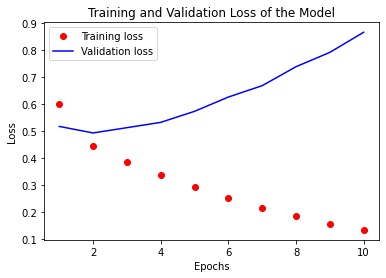

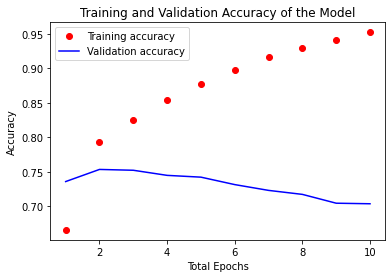

In [6]:
#Displaying Training and Validation Loss

training_loss = output.history['loss']
validation_loss = output.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output.history['acc']
validation_accuracy_values = output.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
testmodel = model.evaluate(imdbtext_test,imdblabel_test)
print(testmodel)

782/782 [==============================] - 4s 5ms/step - loss: 0.9623 - acc: 0.7222
[0.9622647166252136, 0.7222399711608887]


In [7]:
#using the GloVe file to initialize weights in the embedding layer

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

i_word = imdb.get_word_index()
i_embbed = {}
dimension_embbed = 100

path = '/content/glove.6B.100d.txt'

with open(path) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    i_embbed[word] = coefs
f.close()
print("Found %s words vectors." %len(i_embbed))

#embedding matrix to load in the embedding layer
embedding_matrix = np.zeros((features,dimension_embbed))

for word,i in i_word.items():
    if i < features:
        embeddings_vector = i_embbed.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector
        

--2022-11-22 03:27:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-22 03:27:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-22 03:27:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [8]:
#Building the model with weights frozen

model = Sequential()
model.add(Embedding(features,dimension_embbed,input_length=length))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#loading the embedding matrix
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

#training the model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
output1 = model.fit(imdbtext_train,imdblabel_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           1000000   
                                                                 
 flatten_1 (Flatten)         (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                128064    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,128,129
Trainable params: 128,129
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6972 - acc: 0.5300 - val_loss: 0.6902 - val_acc: 0.5204
Epoch 2/10
625/625 [==================

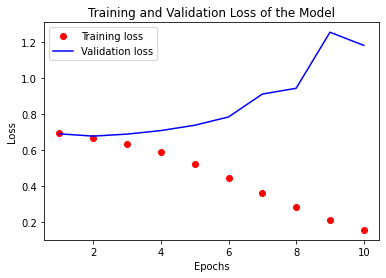

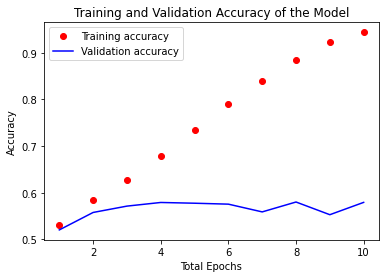

In [9]:
#Displaying Training and Validation Loss

training_loss = output1.history['loss']
validation_loss = output1.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output1.history['acc']
validation_accuracy_values = output1.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
test = model.evaluate(imdbtext_test, imdblabel_test)
print(test)

782/782 [==============================] - 3s 3ms/step - loss: 0.9623 - acc: 0.7222
[0.9622647166252136, 0.7222399711608887]


In [10]:
model.save('/content/gdrive/MyDrive/IMDBglovefreeze')

In [11]:
#unfreezing the weights and training the model again

model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
output2 = model.fit(imdbtext_train,imdblabel_train,epochs=10,batch_size=32,validation_split=0.2)



Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1129 - acc: 0.9628 - val_loss: 1.2845 - val_acc: 0.5918
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0592 - acc: 0.9830 - val_loss: 1.3717 - val_acc: 0.6098
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0300 - acc: 0.9937 - val_loss: 1.5520 - val_acc: 0.6176
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0175 - acc: 0.9955 - val_loss: 1.6873 - val_acc: 0.6248
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0102 - acc: 0.9979 - val_loss: 1.7758 - val_acc: 0.6330
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0052 - acc: 0.9990 - val_loss: 1.9044 - val_acc: 0.6394
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 1.9830 - val_acc: 0.6476
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.

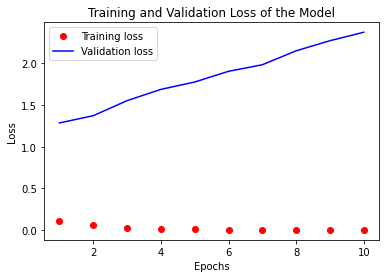

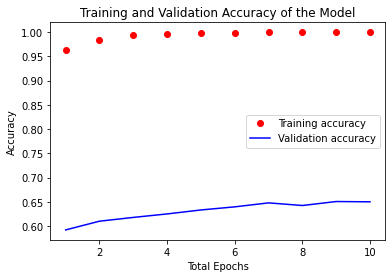

In [12]:
#Displaying Training and Validation Loss

training_loss = output2.history['loss']
validation_loss = output2.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output2.history['acc']
validation_accuracy_values = output2.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#testing the model

testmodel = model.evaluate(imdbtext_test,imdblabel_test)
print(testmodel)

782/782 [==============================] - 2s 3ms/step - loss: 2.3704 - acc: 0.6566
[2.3703789710998535, 0.6565600037574768]


In [14]:
model.save('/content/gdrive/MyDrive/IMDBgloveUnFreeze')

In [15]:
#Replacing the fully connected layer with LSTM layer

model = Sequential()

model.add(Embedding(features,dimension_embbed, input_length=length))
model.add(LSTM(64,return_sequences = True))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

#training the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['acc'])

output3 = model.fit(imdbtext_train,imdblabel_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 10ms/step - loss: 0.5645 - acc: 0.6996 - val_loss: 0.5068 - val_acc: 0.7438
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 0.4285 - acc: 0.8016 - val_loss: 0.5142 - val_acc: 0.7468
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3822 - acc: 0.8295 - val_loss: 0.5084 - val_acc: 0.7520
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3430 - acc: 0.8496 - val_loss: 0.5117 - val_acc: 0.7508
Epoch 5/10
157/157 [==============================] - 1s 7ms/step - loss: 0.3058 - acc: 0.8691 - val_loss: 0.5353 - val_acc: 0.7464
Epoch 6/10
157/157 [==============================] - 1s 7ms/step - loss: 0.2678 - acc: 0.8882 - val_loss: 0.5956 - val_acc: 0.7484
Epoch 7/10
157/157 [==============================] - 1s 7ms/step - loss: 0.2318 - acc: 0.9060 - val_loss: 0.8235 - val_acc: 0.7328
Epoch 8/10
157/157 [==============================] - 1s 7ms/step - loss: 0

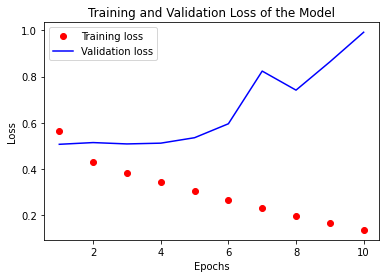

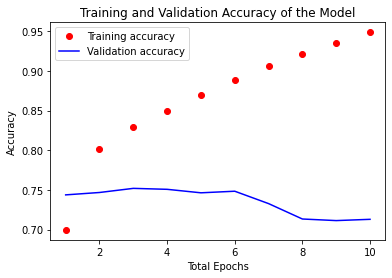

In [16]:
#Displaying Training and Validation Loss

training_loss = output3.history['loss']
validation_loss = output3.history['val_loss']
noofepochs = range(1,len(training_loss)+1)
plt.plot(noofepochs,training_loss,'ro',label='Training loss') 
plt.plot(noofepochs,validation_loss,'b',label='Validation loss') 
plt.title("Training and Validation Loss of the Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Displaying Training and Validation Accuracy

plt.clf()
training_accuracy_values = output3.history['acc']
validation_accuracy_values = output3.history['val_acc']
plt.plot(noofepochs,training_accuracy_values,'ro',label='Training accuracy')
plt.plot(noofepochs,validation_accuracy_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy of the Model')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
evaluate = model.evaluate(imdbtext_test,imdblabel_test)
print(evaluate)

782/782 [==============================] - 3s 3ms/step - loss: 0.9623 - acc: 0.7222
[0.9622647166252136, 0.7222399711608887]


In [18]:
model.save('/content/gdrive/MyDrive/IMDBLSTM')